In [1]:
from mcstasscript.interface import instr, functions, plotter

### Calculator is what I call an instrument object

In [2]:
calculator = instr.McStas_instr(name="demo_instrument")

The following components are found in the work_directory / input_path:
     Union_sphere.comp
     Texture_process.comp
     Union_cone.comp
     Union_box.comp
     Single_crystal_process.comp
     Union_abs_logger_2D_space.comp
     Union_logger_2D_kf.comp
     Template_process.comp
     PhononSimple_process.comp
     Union_conditional_standard.comp
     Union_abs_logger_1D_space.comp
     Union_abs_logger_event.comp
     NCrystal_process.comp
     Union_abs_logger_1D_space_event.comp
     Union_abs_logger_1D_space_tof.comp
     Union_logger_2D_space.comp
     Union_conditional_PSD.comp
     Union_master.comp
     AF_HB_1D_process.comp
     Union_logger_2D_kf_time.comp
     Union_cylinder.comp
     Union_abs_logger_1D_space_tof_to_lambda.comp
     Powder_process.comp
     Union_make_material.comp
     Incoherent_process.comp
     Union_logger_1D.comp
     Union_logger_3D_space.comp
     IncoherentPhonon_process.comp
     Union_logger_2DQ.comp
     Union_mesh.comp
     Union_logger_2D

### Can define parameters (libpyvinyl parameter object and collection)

In [3]:
source_energy = calculator.add_parameter("double", "source_energy", unit="meV", comment="Source mean energy")
source_energy.add_interval(3.1, None, intervals_are_legal=True)

source_height = calculator.add_parameter("double", "source_height", unit="cm", comment="Height of source")
source_height.add_interval(0.01, 0.2, intervals_are_legal=True)

sample_height = calculator.add_parameter("sample_height", unit="cm", comment="Height of sample")
sample_height.add_interval(0.0, 0.05, intervals_are_legal=True)

In [4]:
calculator.show_parameters()

double source_energy          // Source mean energy
double source_height          // Height of source
       sample_height          // Height of sample


In [5]:
print(calculator.parameters)

 - Parameters object -
source_energy       [meV]     Source mean energy   L[3.1, inf]
source_height       [cm]      Height of source   L[0.01, 0.2]
sample_height       [cm]      Height of sample   L[0.0, 0.05]



### Can add components to the simulation as usual

In [6]:
src = calculator.add_component("source", "Source_div")

In [7]:
src.xwidth = 0.12
src.yheight = source_height
src.E0 = source_energy
src.dE = 3
src.focus_aw = 3.0
src.focus_ah = 4.0

In [8]:
sample = calculator.add_component("powder", "PowderN")

In [9]:
sample.set_AT(1, RELATIVE=src)
sample.reflections='"Ni.laz"'
sample.radius = 0.01
sample.yheight = sample_height

In [10]:
calculator.show_components("monitors")

Here are all components in the monitors category.
 Brilliance_monitor      Monitor_Sqw           Pol_monitor
 Cyl_monitor             Monitor_nD            PreMonitor_nD
 DivLambda_monitor       PSD_TOF_monitor       Res_monitor
 DivPos_monitor          PSD_monitor           Sqq_w_monitor
 Divergence_monitor      PSD_monitor_4PI       Sqw_monitor
 EPSD_monitor            PSD_monitor_TOF       TOF2E_monitor
 E_monitor               PSD_monitor_psf       TOF2Q_cylPSD_monitor
 Event_monitor_simple    PSD_monitor_psf_eff   TOFLambda_monitor
 Hdiv_monitor            PSDcyl_monitor        TOF_PSD_monitor_rad
 L_monitor               PSDlin_diff_monitor   TOF_cylPSD_monitor
 MeanPolLambda_monitor   PSDlin_monitor        TOF_monitor
 Monitor                 PolLambda_monitor     TOFlog_monitor
 Monitor_4PI             PolTOF_monitor        


In [11]:
calculator.component_help("Cyl_monitor")

 ___ Help Cyl_monitor _______________________________________________________________
|optional parameter|required parameter|default value|user specified value|
nr = 20.0 [1] // Number of pixel (radial) columns
filename = 0 [string] // Name of file in which to store the detector image
yheight = 10.0 [m] // Height of detector
radius = 1.0 [m] // Radius of detector
restore_neutron = 0.0 [1] // If set, the monitor does not influence the neutron 
                             state 
thmin = 0.0
thmax = 360.0
nowritefile = 0 [1] // If set, monitor will skip writing to disk
-------------------------------------------------------------------------------------


In [12]:
cyl = calculator.add_component("cyl_monitor", "Cyl_monitor")

In [13]:
cyl.nr = 200
cyl.filename = '"cylinder.dat"'
cyl.yheight = 0.2
cyl.radius = 0.5
cyl.restore_neutron = 1
cyl.set_AT(0, RELATIVE=sample)

In [14]:
mon = calculator.add_component("acceptance_horizontal", "DivPos_monitor")

In [15]:
mon.xwidth = 0.2
mon.yheight = 0.2
mon.maxdiv_h = 30.0
mon.filename = '"acceptance_h.dat"'
mon.restore_neutron = 1
mon.nh = 300
mon.ndiv = 300
mon.set_AT(0.1, RELATIVE=sample)

In [16]:
calculator.print_components()

source                Source_div     AT      (0, 0, 0)   ABSOLUTE       
powder                PowderN        AT      (0, 0, 1)   RELATIVE source
cyl_monitor           Cyl_monitor    AT      (0, 0, 0)   RELATIVE powder
acceptance_horizontal DivPos_monitor AT      (0, 0, 0.1) RELATIVE powder


### Could set parameters with a syntax like this

In [17]:
calculator.set_parameters({"source_energy": 320, "source_height":0.025, "sample_height":0.04})

In [18]:
calculator.settings(ncount=5E6, mpi=2, output_path="path_to_output")

### Run with backengine

In [19]:
calculator.backengine()

INFO: Using directory: "/Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/examples/path_to_output_4"
INFO: Regenerating c-file: demo_instrument.c
CFLAGS=
INFO: Recompiling: ./demo_instrument.out
mccode-r.c:1880:1: warning: non-void function does not return a value in all control paths [-Wreturn-type]
} /* mcsiminfo_init */
^
mccode-r.c:2837:3: warning: expression result unused [-Wunused-value]
  *t0;
  ^~~
2 warnings generated.
INFO: ===
         (negative time, miss next components, rounding errors, Nan, Inf).
         (negative time, miss next components, rounding errors, Nan, Inf).
INFO: Placing instr file copy demo_instrument.instr in dataset /Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/examples/path_to_output_4

  Simulation 'demo_instrument' (demo_instrument.instr): running on 2 nodes (master is 'CI0021617', MPI version 3.1).
Opening input file '/Applications/McStas-2.7.1.app/Contents/Resources/mcstas/2.7.1//data/Ni.laz' (Table_Read_Offset)
Table from f

### Get data

In [20]:
data = calculator.data

### Plot data

Plotting data with name cyl_monitor
Plotting data with name acceptance_horizontal


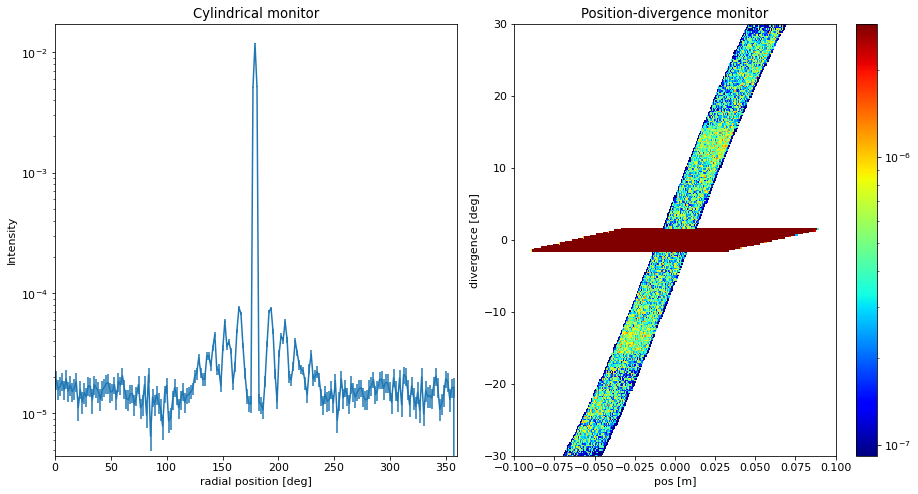

In [21]:
plotter.make_sub_plot(data, log=True, cut_max=0.011, orders_of_mag=1.5)

### Store in dump file

In [22]:
calculator.dump("dump_file.dmp")

'dump_file.dmp'

### Load from dump file

In [23]:
from_dump = instr.McStas_instr("", dumpfile='dump_file.dmp')

The following components are found in the work_directory / input_path:
     Union_sphere.comp
     Texture_process.comp
     Union_cone.comp
     Union_box.comp
     Single_crystal_process.comp
     Union_abs_logger_2D_space.comp
     Union_logger_2D_kf.comp
     Template_process.comp
     PhononSimple_process.comp
     Union_conditional_standard.comp
     Union_abs_logger_1D_space.comp
     Union_abs_logger_event.comp
     NCrystal_process.comp
     Union_abs_logger_1D_space_event.comp
     Union_abs_logger_1D_space_tof.comp
     Union_logger_2D_space.comp
     Union_conditional_PSD.comp
     Union_master.comp
     AF_HB_1D_process.comp
     Union_logger_2D_kf_time.comp
     Union_cylinder.comp
     Union_abs_logger_1D_space_tof_to_lambda.comp
     Powder_process.comp
     Union_make_material.comp
     Incoherent_process.comp
     Union_logger_1D.comp
     Union_logger_3D_space.comp
     IncoherentPhonon_process.comp
     Union_logger_2DQ.comp
     Union_mesh.comp
     Union_logger_2D

In [24]:
print(from_dump.name)
from_dump.print_components()

demo_instrument
source                Source_div     AT      (0, 0, 0)   ABSOLUTE       
powder                PowderN        AT      (0, 0, 1)   RELATIVE source
cyl_monitor           Cyl_monitor    AT      (0, 0, 0)   RELATIVE powder
acceptance_horizontal DivPos_monitor AT      (0, 0, 0.1) RELATIVE powder


In [25]:
with open("demo_instrument.instr", "r") as f:
    instrument_file = f.read()
print(instrument_file)

/********************************************************************************
* 
* McStas, neutron ray-tracing package
*         Copyright (C) 1997-2008, All rights reserved
*         Risoe National Laboratory, Roskilde, Denmark
*         Institut Laue Langevin, Grenoble, France
* 
* This file was written by McStasScript, which is a 
* python based McStas instrument generator written by 
* Mads Bertelsen in 2019 while employed at the 
* European Spallation Source Data Management and 
* Software Center
* 
* Instrument demo_instrument
* 
* %Identification
* Written by: Python McStas Instrument Generator
* Date: 17:07:30 on December 10, 2021
* Origin: ESS DMSC
* %INSTRUMENT_SITE: Generated_instruments
* 
* 
* %Parameters
* 
* %End 
********************************************************************************/

DEFINE INSTRUMENT demo_instrument (
double source_energy = 320,// Source mean energy
double source_height = 0.025,// Height of source
 sample_height = 0.04 // Height of sampl